<img src="https://media-exp1.licdn.com/dms/image/C560BAQFgHU3sTF4LfQ/company-logo_200_200/0/1519895156650?e=2159024400&v=beta&t=1iqBaESC2l4UUW7JjEjq0R_HQhwRTaaqyQG1k46q4bs" style="float:left" height = "250" width="250" >

# The Sparks Foundation 
## (Gradual Rotational Internship Program)
## Author:
# Tushar Vilas Chavan
## Data Science and Business Analytics Intern

 - <a href="https://www.linkedin.com/in/tushar-chavan-learner/">LinkedIn</a>
 - <a href="https://github.com/ChavanTushar14">GitHub</a>
 
        




# Problem Satatement :  Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## Data:
**Dataset taken from link given below**
http://bit.ly/w-data


**Initially we will import all the libararies needed for the task**

In [85]:
library(tidyverse) 
library(repr)
library(ggplot2)
library(car)



# Data Exploratory Analysis
**Importing the data from web**

In [86]:
options(repr.plot.height=5,repr.width=5)
data_score <- read.table("http://bit.ly/w-data", header = TRUE, sep = ",")
head(data_score)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


In [89]:
str(data_score)
summary(data_score)
cor(data_score)
rowSums(is.na(data_score))

'data.frame':	25 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

,Hours,Scores
Hours,1.0000000,0.9761907
Scores,0.9761907,1.0000000


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

**Summary about Dataset**
 - Hours(Independent Variable)
 - Scores(Dependent Variable)

**Data Visualization**

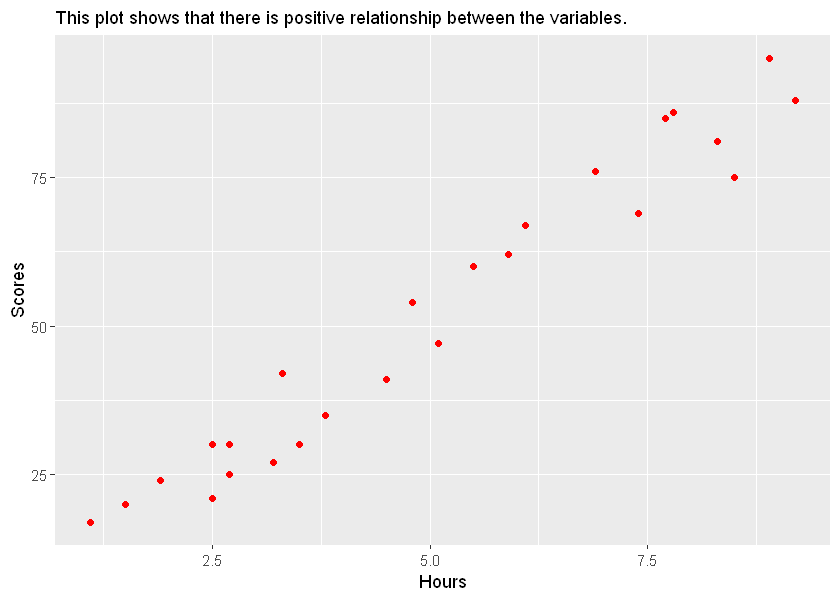

In [90]:

graph <- ggplot(data_score, aes(Hours,Scores)) + geom_point(color="red") + labs(subtitle="This plot shows that there is positive relationship between the variables.")
graph

**Checking for Normal Distribution using Q-Q Plot**

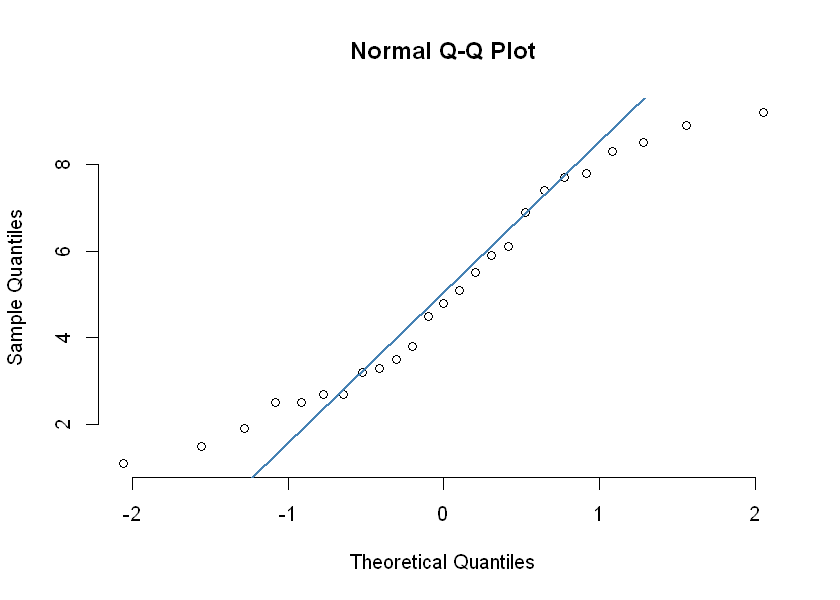

In [96]:

qqnorm(data_score$Hours, pch = 1, frame = FALSE)
qqline(data_score$Hours, col = "steelblue", lwd = 2)

## We can see in the diagram, the feature(Hour) is normally distributed! So, we can achieve higher accuracy in ML model.

# Data Modelling

**Splliting the  dataset into training and testing samples along with feature and label**

In [81]:

split_size = 0.8
sample_size = floor(split_size * nrow(data_score))
set.seed(123)
train_indices <- sample(seq_len(nrow(data_score)), size = sample_size)
train <- data_score[train_indices, ]
test <- data_score[-train_indices, ]
train
test



,Hours,Scores
15,1.1,17
19,6.1,67
14,3.3,42
3,3.2,27
10,2.7,25
18,1.9,24
11,7.7,85
5,3.5,30
23,3.8,35
6,1.5,20


,Hours,Scores
2,5.1,47
4,8.5,75
7,9.2,88
8,5.5,60
16,8.9,95


# Linear Regression
## Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).
## So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.


## Hypothesis function for Linear Regression is given by y=mx+c
## where 
 - x: input training data
 - y:  labels to data 

## When training the model, it fits the best line to predict the value of y for a given value of x.

## The model get best fit by finding the appropriate values of two variables

 - m : Coefficiant of x
 - c : Intercept



**How to get best values of m and C?**
1. Cost Function (J) : 
    - By achieving the best-fit regression line, the model aims to predict y value such that the error difference between   predicted value and true value is minimum. 
    - Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y).
 
2. Gradient Descent : 
    - To update m and c values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent.
    - The idea is to start with random c and m values and then iteratively updating the values, reaching minimum cost.
    <br> <br>
<img src="http://media5.datahacker.rs/2018/06/word-image-30.jpeg" style="float:left" height = "550" width="550" >
 

**Training the model**

In [65]:
model <- lm(Scores ~ Hours, data = data_score)
summary(model)









Call:
lm(formula = Scores ~ Hours, data = data_score)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


**Plotting the regression line**

`geom_smooth()` using formula 'y ~ x'


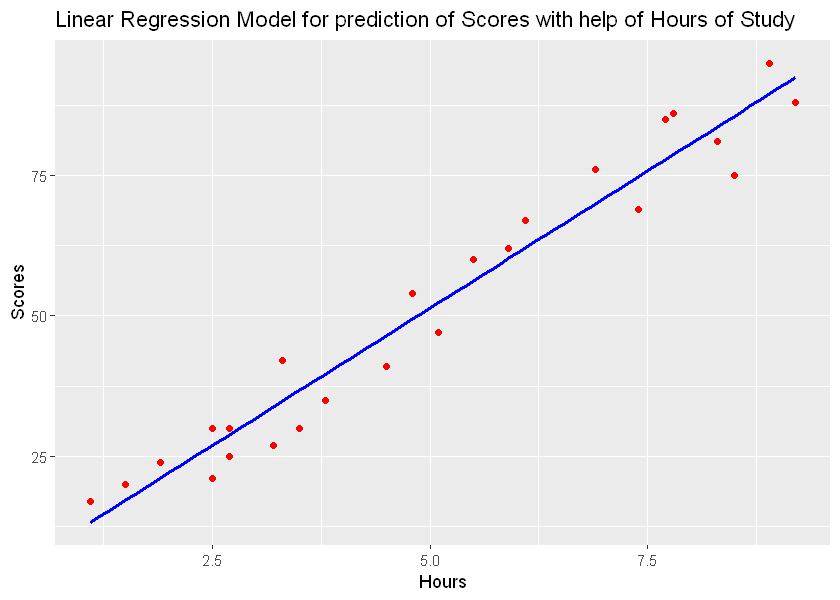

In [66]:
#plotting the regression line
fitting  <- ggplot(data_score, aes(Hours,Scores)) +
geom_point(color="red") + geom_smooth(method = lm, se = FALSE, color="blue") + labs(title="Linear Regression Model for Prediction of Scores with help of Hours of Study")
fitting

**Predcitions based on test sample**

In [73]:

new.data <- data.frame(Hours = test$Hours)
test$output <- predict(model, new.data)
frame <- data.frame(Actual = c(test$Scores), Predicted = c(test$output))
frame


Actual,Predicted
47,52.34027
75,85.57800
88,92.42106
60,56.25059
95,89.48832


**Prediction of desired result**

In [74]:


newdata=data.frame(Hours=c(9.25))
result <- predict(model,newdata)
sprintf("Number of hours %s",newdata$Hours)
sprintf("Predicted Score : %s", result)

[1] "Number of hours 9.25"

[1] "Predicted Score : 92.9098547701573"

**Evaluation of Model**

In [76]:

rmse = sqrt(sum(test$Scores - test$output)^2/nrow(test))
sprintf("The root mean squre error in the model is : %s", rmse)



[1] "The root mean squre error in the model is : 4.95434542940271"